In [1]:
from glob import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statannot import add_stat_annotation

sns.set(style="darkgrid")

# disable warings
import warnings
warnings.filterwarnings('ignore')

# Signal Model

# Methods


## description

# Experiements

## Noise
The stationary noise PSD matrix is estimated
using an ideal voice activity detector,

# Load results

## synth results

In [2]:
path_to_data = '../recipes/echo_aware_processing/data/interim/'
files = glob(path_to_data + '2020-08-25*.csv')
results = pd.DataFrame()
for file in files:
    res = pd.read_csv(file)
    results = results.append(res, ignore_index=True)
    print(file)

../recipes/echo_aware_processing/data/interim/2020-08-25_results_arr-4_data-synt_dataset-0_snr-0_sir_20.csv
../recipes/echo_aware_processing/data/interim/2020-08-25_results_arr-4_data-real_dataset-3_snr-10_sir_20.csv
../recipes/echo_aware_processing/data/interim/2020-08-25_results_arr-4_data-synt_dataset-5_snr-20_sir_0.csv
../recipes/echo_aware_processing/data/interim/2020-08-25_results_arr-0_data-real_dataset-5_snr-20_sir_0.csv
../recipes/echo_aware_processing/data/interim/2020-08-25_results_arr-4_data-synt_dataset-3_snr-20_sir_20.csv
../recipes/echo_aware_processing/data/interim/2020-08-25_results_arr-4_data-real_dataset-5_snr-0_sir_20.csv
../recipes/echo_aware_processing/data/interim/2020-08-25_results_arr-4_data-real_dataset-3_snr-10_sir_10.csv
../recipes/echo_aware_processing/data/interim/2020-08-25_results_arr-0_data-real_dataset-3_snr-20_sir_20.csv
../recipes/echo_aware_processing/data/interim/2020-08-25_results_arr-0_data-real_dataset-3_snr-20_sir_0.csv
../recipes/echo_aware_pr

../recipes/echo_aware_processing/data/interim/2020-08-25_results_arr-2_data-synt_dataset-0_snr-20_sir_20.csv
../recipes/echo_aware_processing/data/interim/2020-08-25_results_arr-0_data-synt_dataset-5_snr-0_sir_20.csv
../recipes/echo_aware_processing/data/interim/2020-08-25_results_arr-0_data-real_dataset-3_snr-10_sir_20.csv
../recipes/echo_aware_processing/data/interim/2020-08-25_results_arr-4_data-real_dataset-0_snr-20_sir_20.csv
../recipes/echo_aware_processing/data/interim/2020-08-25_results_arr-4_data-real_dataset-5_snr-10_sir_20.csv
../recipes/echo_aware_processing/data/interim/2020-08-25_results_arr-0_data-synt_dataset-3_snr-20_sir_10.csv
../recipes/echo_aware_processing/data/interim/2020-08-25_results_arr-2_data-real_dataset-0_snr-10_sir_10.csv
../recipes/echo_aware_processing/data/interim/2020-08-25_results_arr-2_data-real_dataset-0_snr-0_sir_0.csv
../recipes/echo_aware_processing/data/interim/2020-08-25_results_arr-0_data-real_dataset-0_snr-10_sir_20.csv
../recipes/echo_aware_

../recipes/echo_aware_processing/data/interim/2020-08-25_results_arr-2_data-synt_dataset-5_snr-0_sir_0.csv
../recipes/echo_aware_processing/data/interim/2020-08-25_results_arr-0_data-synt_dataset-3_snr-0_sir_10.csv
../recipes/echo_aware_processing/data/interim/2020-08-25_results_arr-4_data-synt_dataset-3_snr-20_sir_0.csv
../recipes/echo_aware_processing/data/interim/2020-08-25_results_arr-2_data-real_dataset-0_snr-10_sir_20.csv
../recipes/echo_aware_processing/data/interim/2020-08-25_results_arr-2_data-real_dataset-0_snr-10_sir_0.csv
../recipes/echo_aware_processing/data/interim/2020-08-25_results_arr-4_data-synt_dataset-0_snr-20_sir_0.csv


In [3]:
results

,Unnamed: 0,data,array,dataset,target_idx,interf_idx,sir,snr,spk_comb,bf,sir_in,snr_in,sdr_in,sir_out,snr_out,sdr_out,pesq_in,pesq_out
0,0,synt,4.0,0.0,0.0,1.0,20.0,0.0,0.0,dpDS,22.431626,-0.008035,-0.034890,24.487689,5.249598,5.188819,1.479413,1.889137
1,1,synt,4.0,0.0,0.0,1.0,20.0,0.0,0.0,rtfMVDR,22.431626,-0.008035,-0.034890,23.072379,5.112866,5.050471,1.479413,1.886793
2,2,synt,4.0,0.0,0.0,1.0,20.0,0.0,0.0,ecoMVDR,22.431626,-0.008035,-0.034890,26.610365,6.558108,6.522921,1.479413,1.962436
3,3,synt,4.0,0.0,0.0,1.0,20.0,0.0,0.0,rtfLCMV,22.431626,-0.008035,-0.034890,26.218166,3.578407,3.555353,1.479413,1.841181
4,4,synt,4.0,0.0,0.0,1.0,20.0,0.0,0.0,ecoLCMV,22.431626,-0.008035,-0.034890,50.783233,6.204651,6.204611,1.479413,1.960112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58090,355,synt,4.0,0.0,3.0,2.0,0.0,20.0,5.0,dpDS,2.739215,19.991965,2.655161,6.754761,25.646821,6.693242,3.174267,3.500212
58091,356,synt,4.0,0.0,3.0,2.0,0.0,20.0,5.0,rtfMVDR,2.739215,19.991965,2.655161,13.545648,27.164609,13.350019,3.174267,3.582418
58092,357,synt,4.0,0.0,3.0,2.0,0.0,20.0,5.0,ecoMVDR,2.739215,19.991965,2.655161,10.142952,26.898899,10.045678,3.174267,3.524528
58093,358,synt,4.0,0.0,3.0,2.0,0.0,20.0,5.0,rtfLCMV,2.739215,19.991965,2.655161,35.301196,26.779347,26.203957,3.174267,3.582702


In [7]:
# check values
print(pd.unique(results.loc[:, 'snr']))
print(pd.unique(results.loc[:, 'sir']))
print(pd.unique(results.loc[:, 'bf']))
print(pd.unique(results.loc[:, 'target_idx']))
print(pd.unique(results.loc[:, 'interf_idx']))
print(pd.unique(results.loc[:, 'dataset']))
print(pd.unique(results.loc[:, 'data']))
print(pd.unique(results.loc[:, 'array']))

[ 0. 10. 20.]
[20.  0. 10.]
['dpDS' 'rtfMVDR' 'ecoMVDR' 'rtfLCMV' 'ecoLCMV']
[0. 1. 2. 3.]
[1. 2. 3. 0.]
[0. 3. 5.]
['synt' 'real']
[4. 0. 2.]


# Global metrics vs bf

In [8]:
df = results.copy()
print('Check dimension')
print(len(df.loc[(df['bf']=='dpDS') & (df['data']=='real')]))
print(len(df.loc[(df['bf']=='dpDS') & (df['data']=='synt')]))
print(len(df.loc[(df['bf']=='rtfMVDR') & (df['data']=='real')]))
print(len(df.loc[(df['bf']=='rtfMVDR') & (df['data']=='synt')]))
print(len(df.loc[(df['bf']=='rtfLCMV') & (df['data']=='real')]))
print(len(df.loc[(df['bf']=='rtfLCMV') & (df['data']=='synt')]))
print(len(df.loc[(df['bf']=='ecoMVDR') & (df['data']=='real')]))
print(len(df.loc[(df['bf']=='ecoMVDR') & (df['data']=='synt')]))
print(len(df.loc[(df['bf']=='ecoLCMV') & (df['data']=='real')]))
print(len(df.loc[(df['bf']=='ecoLCMV') & (df['data']=='synt')]))

Check dimension
5809
5810
5809
5810
5809
5810
5809
5810
5809
5810


## Incemental metrics vs bf

Given the following signal model
$$ \mathbf{c}(f) = [ h_1(f), h_2{f}, \dots, h_I(f) ] s(f)$$
and let assume 1 to be the reference microphones,

We consider the following metris

$$ \mathtt{SNR}_\text{input} = 10 \log_{10} \frac{\mathbb{E}[(h_1 s)^2]}{\sigma^2_{n_1}} $$
$$ \mathtt{SIR}_\text{input} = 10 \log_{10} \frac{\sigma^2_{c_1}}{\sigma^2_{n_1}} $$

In [9]:
# filters
dataset = 2
array = 2

loc_res = df.copy()
# loc_res = loc_res.loc[(loc_res['dataset'] == dataset) & (loc_res['array'] == array) ]
loc_res

,Unnamed: 0,data,array,dataset,target_idx,interf_idx,sir,snr,spk_comb,bf,sir_in,snr_in,sdr_in,sir_out,snr_out,sdr_out,pesq_in,pesq_out
0,0,synt,4.0,0.0,0.0,1.0,20.0,0.0,0.0,dpDS,22.431626,-0.008035,-0.034890,24.487689,5.249598,5.188819,1.479413,1.889137
1,1,synt,4.0,0.0,0.0,1.0,20.0,0.0,0.0,rtfMVDR,22.431626,-0.008035,-0.034890,23.072379,5.112866,5.050471,1.479413,1.886793
2,2,synt,4.0,0.0,0.0,1.0,20.0,0.0,0.0,ecoMVDR,22.431626,-0.008035,-0.034890,26.610365,6.558108,6.522921,1.479413,1.962436
3,3,synt,4.0,0.0,0.0,1.0,20.0,0.0,0.0,rtfLCMV,22.431626,-0.008035,-0.034890,26.218166,3.578407,3.555353,1.479413,1.841181
4,4,synt,4.0,0.0,0.0,1.0,20.0,0.0,0.0,ecoLCMV,22.431626,-0.008035,-0.034890,50.783233,6.204651,6.204611,1.479413,1.960112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58090,355,synt,4.0,0.0,3.0,2.0,0.0,20.0,5.0,dpDS,2.739215,19.991965,2.655161,6.754761,25.646821,6.693242,3.174267,3.500212
58091,356,synt,4.0,0.0,3.0,2.0,0.0,20.0,5.0,rtfMVDR,2.739215,19.991965,2.655161,13.545648,27.164609,13.350019,3.174267,3.582418
58092,357,synt,4.0,0.0,3.0,2.0,0.0,20.0,5.0,ecoMVDR,2.739215,19.991965,2.655161,10.142952,26.898899,10.045678,3.174267,3.524528
58093,358,synt,4.0,0.0,3.0,2.0,0.0,20.0,5.0,rtfLCMV,2.739215,19.991965,2.655161,35.301196,26.779347,26.203957,3.174267,3.582702


In [77]:
def boxplot_performance(loc_res, plot_for, save=False):
    loc_res['sir_inc'] = loc_res['sir_out'] - loc_res['sir_in']
    loc_res['snr_inc'] = loc_res['snr_out'] - loc_res['snr_in']
    loc_res['pesq_inc'] = loc_res['pesq_out'] - loc_res['pesq_in']
    loc_res['sdr_inc'] = loc_res['sdr_out'] - loc_res['sdr_in']

    # beautiful plot
    name = {
        'dpDS'    : '$\mathtt{DS}$',
        'rtfMVDR' : '$\mathtt{MVDR}_{\mathtt{rtf}}$',
        'rtfLCMV' : '$\mathtt{LCMV}_{\mathtt{rtf}}$',
        'ecoMVDR' : '$\mathtt{MVDR}_{\mathtt{echo}}$',
        'ecoLCMV' : '$\mathtt{LCMV}_{\mathtt{echo}}$',
    }
    test = ['t-test_welch', 'Wilcoxon', 'Mann-Whitney'][2]

    width = 0.7
    angle = 15
    loc_res = loc_res.replace('dpDS',    value=name['dpDS'])
    loc_res = loc_res.replace('rtfMVDR', value=name['rtfMVDR'])
    loc_res = loc_res.replace('rtfLCMV', value=name['rtfLCMV'])
    loc_res = loc_res.replace('ecoMVDR', value=name['ecoMVDR'])
    loc_res = loc_res.replace('ecoLCMV', value=name['ecoLCMV'])

    if 'snr_sir' in plot_for:
        plt.figure(figsize=(12,4))
        plt.subplot(121)
        x = 'bf'
        y = 'snr_inc'
        hue = 'data'
        g1 = sns.boxplot(x=x, y=y, hue=hue, data=loc_res, width=width, hue_order=['synt', 'real'])
        order = g1.get_xticklabels()
        # box_pairs=[
        #     ((name['dpDS'], "real"),    (name['dpDS'], "synt")),
        #     ((name['rtfMVDR'], "real"), (name['rtfMVDR'], "synt")),
        #     ((name['rtfLCMV'], "real"), (name['rtfLCMV'], "synt")),
        #     ((name['ecoMVDR'], "real"), (name['ecoMVDR'], "synt")),
        #     ((name['ecoLCMV'], "real"), (name['ecoLCMV'], "synt")),
        #     ((name['rtfMVDR'], "real"), (name['ecoMVDR'], "real")),
        #     ((name['rtfLCMV'], "real"), (name['ecoLCMV'], "real")),
        #     ]
        # add_stat_annotation(g1, data=loc_res, x=x, y=y, hue=hue, box_pairs=box_pairs,
        #                     test=test, loc='outside', verbose=2)
        g1.set_xticklabels(g1.get_xticklabels(), rotation=angle, horizontalalignment='right')
        g1.legend_.remove()
        g1.set(ylabel=r'$\Delta\mathtt{SNR}$ [dB]', xlabel='')

        plt.subplot(122)
        g2 = sns.boxplot(x='bf', y="sir_inc", hue='data', data=loc_res, width=width, hue_order=['synt', 'real'])
        g2.set_xticklabels(g2.get_xticklabels(), rotation=angle, horizontalalignment='right')
        g2.legend_.remove()
        g2.legend(bbox_to_anchor=(0.3, 0.66, 0.5, 0.5), loc=1, ncol=2)
        g2.set(ylabel=r'$\Delta\mathtt{SIR}$ [dB]', xlabel='')
        plt.tight_layout()
        if save:
            plt.savefig('../recipes/echo_aware_processing/snir_results_boxplot.pdf', dpi=300)


    if 'sdr_pesq' in plot_for:
        plt.figure(figsize=(12,4))
        plt.subplot(121)
        x = 'bf'
        y = 'sdr_inc'
        hue = 'data'
        g4 = sns.boxplot(x=x, y=y, hue=hue, data=loc_res, width=width, hue_order=['synt', 'real'])
        order = g4.get_xticklabels()
        # box_pairs=[
        #     ((name['dpDS'], "real"),    (name['dpDS'], "synt")),
        #     ((name['rtfMVDR'], "real"), (name['rtfMVDR'], "synt")),
        #     ((name['rtfLCMV'], "real"), (name['rtfLCMV'], "synt")),
        #     ((name['ecoMVDR'], "real"), (name['ecoMVDR'], "synt")),
        #     ((name['ecoLCMV'], "real"), (name['ecoLCMV'], "synt")),
        #     ((name['rtfMVDR'], "real"), (name['ecoMVDR'], "real")),
        #     ((name['rtfLCMV'], "real"), (name['ecoLCMV'], "real")),
        #     ((name['rtfMVDR'], "synt"), (name['ecoMVDR'], "synt")),
        #     ((name['rtfLCMV'], "synt"), (name['ecoLCMV'], "synt")),
        #     ((name['rtfMVDR'], "synt"), (name['rtfLCMV'], "synt")),
        #     ((name['ecoMVDR'], "synt"), (name['ecoLCMV'], "synt")),
        #     ]
        # add_stat_annotation(g4, data=loc_res, x=x, y=y, hue=hue, box_pairs=box_pairs,
        #                     test=test, loc='outside', verbose=2)
        g4.set_xticklabels(g4.get_xticklabels(), rotation=angle, horizontalalignment='right')
        g4.legend_.remove()
        g4.set(ylabel=r'$\Delta\mathtt{SDR}$ [dB]', xlabel='')
        g4.set_ylim([-7, 15])

        plt.subplot(122)
        g3 = sns.boxplot(x='bf', y="pesq_inc", hue='data', data=loc_res, width=width, hue_order=['synt', 'real'])
        g3.set_xticklabels(g3.get_xticklabels(), rotation=angle, horizontalalignment='right')
        g3.legend_.remove()
        g3.legend(bbox_to_anchor=(0.51, 0.66, 0.5, 0.5), loc=1, ncol=2)
        g3.set(ylabel=r'$\Delta\mathtt{PESQ}$', xlabel='')
        g3.set_ylim([-0.5, 1.5])
        
        plt.tight_layout()
        if save:
            plt.savefig('../recipes/echo_aware_processing/pesq_results_boxplot.pdf', dpi=300)
        plt.show()

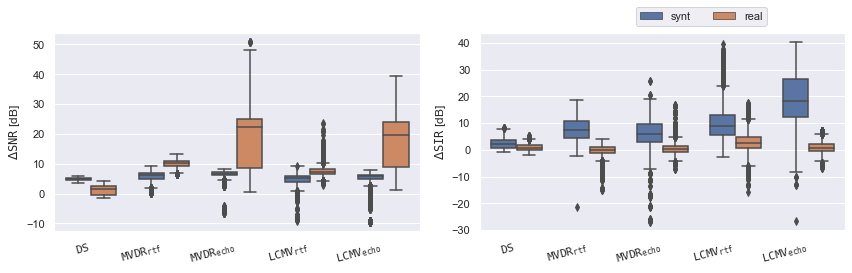

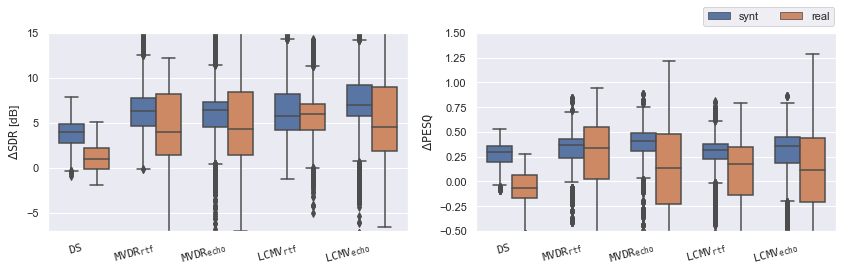

In [78]:
boxplot_performance(df, plot_for = ['snr_sir', 'sdr_pesq'])

# Manual Insight

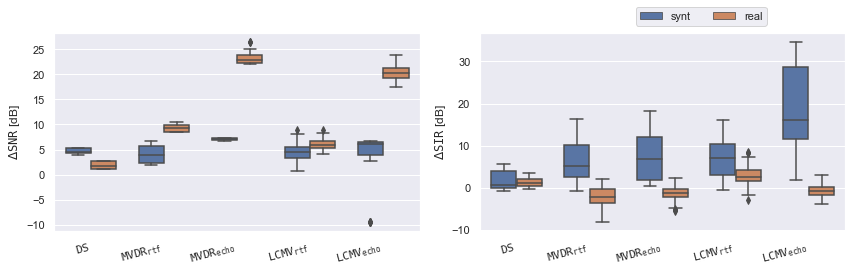

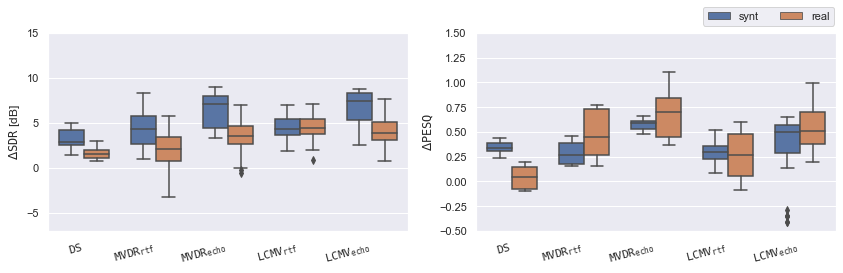

In [81]:
loc_res = df.loc[
#       (df['dataset'] == 0) 
      (df['array'] == 0) 
    & (df['target_idx'] == 0) 
#     & (df['interf_idx'] == 1) 
    & (df['sir'] == 0) 
    & (df['snr'] == 0) 
]
boxplot_performance(loc_res, plot_for = ['snr_sir', 'sdr_pesq'])

# Performance vs Dataset (~ RT60)

In [ ]:
# filter
loc_res_synt = results_synt.copy()
loc_res_real = results_real.copy()
loc_ress = [loc_res_synt, loc_res_real]
# plot
for loc_res in loc_ress:

    loc_res['sir_inc'] = loc_res['sir_out'] - loc_res['sir_in']
    loc_res['snr_inc'] = loc_res['snr_out'] - loc_res['snr_in']
    loc_res['pesq_inc'] = loc_res['pesq_out'] - loc_res['pesq_in']
    # plot
    varx = 'dataset'
    varh = 'bf'
    plt.figure(figsize=(21,6))
    plt.subplot(131)
    sns.boxplot(x=varx, y="sir_inc", hue=varh,
                data=loc_res)
    plt.subplot(132)
    sns.boxplot(x=varx, y="snr_inc", hue=varh,
                data=loc_res)
    plt.subplot(133)
    sns.boxplot(x=varx, y="pesq_inc", hue=varh,
                data=loc_res)
    plt.show()

# Performance vs Geomtery (~ DDR)

In [ ]:
# filter
loc_res = results.copy()
loc_res['sir_inc'] = loc_res['sir_out'] - loc_res['sir_in']
loc_res['snr_inc'] = loc_res['snr_out'] - loc_res['snr_in']
loc_res['pesq_inc'] = loc_res['pesq_out'] - loc_res['pesq_in']
# plot
grid = sns.axisgrid.FacetGrid(loc_res, row='array', col='target_idx', sharey=True)
grid.map(sns.boxplot, 'bf', 'sir_inc')

In [ ]:
# filter
loc_res = results.copy()
loc_res['sir_inc'] = loc_res['sir_out'] - loc_res['sir_in']
loc_res['snr_inc'] = loc_res['snr_out'] - loc_res['snr_in']
loc_res['pesq_inc'] = loc_res['pesq_out'] - loc_res['pesq_in']
# plot
grid = sns.axisgrid.FacetGrid(loc_res, row='array', col='target_idx', sharey=True)
grid.map(sns.boxplot, 'bf', 'snr_inc')

In [ ]:
# filter
loc_res = results.copy()
loc_res['sir_inc'] = loc_res['sir_out'] - loc_res['sir_in']
loc_res['snr_inc'] = loc_res['snr_out'] - loc_res['snr_in']
loc_res['pesq_inc'] = loc_res['pesq_out'] - loc_res['pesq_in']
# plot
varx = 'array'
varh = 'bf'
plt.figure(figsize=(21,6))
plt.subplot(131)
sns.boxplot(x=varx, y="sir_inc", hue=varh,
            data=loc_res)
plt.subplot(132)
sns.boxplot(x=varx, y="snr_inc", hue=varh,
            data=loc_res)
plt.subplot(133)
sns.boxplot(x=varx, y="pesq_inc", hue=varh,
            data=loc_res)
plt.show()

In [ ]:
# filter
loc_res = results.copy()
loc_res['sir_inc'] = loc_res['sir_out'] - loc_res['sir_in']
loc_res['snr_inc'] = loc_res['snr_out'] - loc_res['snr_in']
loc_res['pesq_inc'] = loc_res['pesq_out'] - loc_res['pesq_in']
# plot
varx = 'target_idx'
varh = 'bf'
plt.figure(figsize=(21,6))
plt.subplot(131)
sns.boxplot(x=varx, y="sir_inc", hue=varh,
            data=loc_res)
plt.subplot(132)
sns.boxplot(x=varx, y="snr_inc", hue=varh,
            data=loc_res)
plt.subplot(133)
sns.boxplot(x=varx, y="pesq_inc", hue=varh,
            data=loc_res)
plt.show()

In [ ]:
res